#Questão 1: Classificador Bayesiano

O naufrágio do Titanic em 1912 resultou em milhares de dados sobre os passageiros, que são frequentemente utilizados para problemas de classificação em machine learning. Você está desenvolvendo um modelo preditivo utilizando o classificador Naive Bayes para prever a sobrevivência de passageiros, usando o arquivo `titanic.csv` fornecido.

Faça uma análise preditiva completa, conforme os itens abaixo:

##a) Análise Exploratória:

Explore o conjunto de dados, identificando valores faltantes e apresentando um resumo estatístico das principais variáveis que você considera importantes para prever a sobrevivência (exemplo: idade, sexo, classe, número de familiares a bordo, tarifa paga, etc).

In [11]:
import pandas as pd
df = pd.read_csv('titanic.csv')
print("Primeiras 5 linhas do DataFrame:")
print(df.head())
print("\nInformações sobre as colunas e tipos de dados:")
print(df.info())

Primeiras 5 linhas do DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171     7.25   NaN        S  
1      0          PC 17599  712.833   C85        C  
2      0  STON/O2. 3101282    7.925   NaN        S  
3      0            113803     53.1  C123        S  
4      0            37

In [12]:
print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Valores faltantes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
print("\nEstatísticas descritivas para variáveis numéricas (Idade, Tarifa, SibSp, Parch):")
print(df[['Age', 'Fare', 'SibSp', 'Parch']].describe())

print("\nDistribuição de Sexo:")
print(df['Sex'].value_counts())

print("\nDistribuição de Classe (Pclass):")
print(df['Pclass'].value_counts())

print("\nDistribuição de Porto de Embarque (Embarked):")
print(df['Embarked'].value_counts())


Estatísticas descritivas para variáveis numéricas (Idade, Tarifa, SibSp, Parch):
              Age       SibSp       Parch
count  714.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594
std     14.526497    1.102743    0.806057
min      0.420000    0.000000    0.000000
25%     20.125000    0.000000    0.000000
50%     28.000000    0.000000    0.000000
75%     38.000000    1.000000    0.000000
max     80.000000    8.000000    6.000000

Distribuição de Sexo:
Sex
male      577
female    314
Name: count, dtype: int64

Distribuição de Classe (Pclass):
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Distribuição de Porto de Embarque (Embarked):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


##b) Pré-processamento:

- Mostre como você trata valores faltantes.

- Transforme variáveis categóricas em variáveis numéricas (dummificação ou codificação adequada).

- Explique sua escolha de variáveis para o modelo (quais você usou e por quê).

In [14]:
#tratar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)#preencher age com a mediana
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #preencher embarked com o modo
df.drop('Cabin', axis=1, inplace=True)#descartar a coluna cabin

print("\nValores faltantes após o tratamento:")
print(df.isnull().sum()) # Verifique se não há mais nulos nas colunas tratadas


Valores faltantes após o tratamento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-14-509068760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)#preencher age com a mediana
/tmp/ipython-input-14-509068760.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [15]:
if df['Fare'].dtype == 'object':
    print("Coluna 'Fare' detectada como tipo 'object'. Tentando conversão...")
    df['Fare'] = df['Fare'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df['Fare'] = pd.to_numeric(df['Fare'])
    print("Coluna 'Fare' convertida para numérica.")

Coluna 'Fare' detectada como tipo 'object'. Tentando conversão...
Coluna 'Fare' convertida para numérica.


In [16]:
#transformar variaveis categoricas em numericas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print("\nDataFrame após dummificação:")
print(df.head())


DataFrame após dummificação:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket    Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171     725      True       False        True  
1          PC 17599  712833     False       False       False  
2  STON/O2. 3101282    7925     False       False        True  
3            113803     531     False   

##c) Treinamento do Modelo:

- Divida os dados em treino (70%) e teste (30%) de forma estratificada.

- Treine um classificador Naive Bayes.

- Mostre o código utilizado.

In [17]:
#definir features e target
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"Proporção de sobreviventes no treino: {y_train.sum() / len(y_train):.2f}")
print(f"Proporção de sobreviventes no teste: {y_test.sum() / len(y_test):.2f}")


Tamanho do conjunto de treino: (623, 8)
Tamanho do conjunto de teste: (268, 8)
Proporção de sobreviventes no treino: 0.38
Proporção de sobreviventes no teste: 0.38


In [19]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()#instanciar o modelo

model_nb.fit(X_train, y_train)#treinar o modelo

print("\nModelo Naive Bayes treinado com sucesso!")


Modelo Naive Bayes treinado com sucesso!


##d) Avaliação:

- Calcule a `acurácia`, `precisão`, `recall` e `F1-score` do modelo.

- Apresente e interprete a matriz de confusão.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_nb = model_nb.predict(X_test)#fazer predições

#calcular métricas
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print(f"\n--- Métricas de Avaliação do Classificador Naive Bayes ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


--- Métricas de Avaliação do Classificador Naive Bayes ---
Acurácia: 0.6642
Precisão: 0.8421
Recall: 0.1553
F1-score: 0.2623


In [21]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nMatriz de Confusão:")
print(conf_matrix_nb)


Matriz de Confusão:
[[162   3]
 [ 87  16]]


##e) Discussão Crítica:

  Identifique possíveis limitações do classificador Naive Bayes para este problema.

Assunção de Independência das Características: O algoritmo assume que as características são independentes, uma premissa que é frequentemente violada em dados reais (ex: correlação entre Pclass e Fare, ou SibSp e Parch).

Assunção de Distribuição Gaussiana: O GaussianNB parte do princípio de que as variáveis contínuas seguem uma distribuição normal. Discrepâncias significativas em relação a essa distribuição podem afetar a precisão das probabilidades estimadas.

Incapacidade de Capturar Interações Complexas: Sendo um modelo linear simples, o Naive Bayes não é apto a identificar e modelar relações não lineares ou interações complexas entre as variáveis, que poderiam ser determinantes para a sobrevivência em cenários específicos.

#Questão 2: Regressão Linear

Você foi contratado como cientista de dados para ajudar uma imobiliária a prever preços de casas na Califórnia. Use regressão linear para criar um modelo que prediga o valor mediano das casas com base em características como localização, idade, número de quartos, etc.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar e explorar os dados
print("=== EXPLORANDO O DATASET ===")
data = fetch_california_housing()
X = data.data
y = data.target

print(f"Formato dos dados: {X.shape}")
print(f"Características: {data.feature_names}")
print(f"Descrição: {data.DESCR[:200]}...")

# 2. Separar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nDados de treino: {X_train.shape}")
print(f"Dados de teste: {X_test.shape}")

=== EXPLORANDO O DATASET ===
Formato dos dados: (20640, 8)
Características: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Descrição: .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attribu...

Dados de treino: (16512, 8)
Dados de teste: (4128, 8)


##a) Crie e treine o modelo de regressão linear
    Dica: Use LinearRegression() e o método .fit()

In [23]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print("\nModelo de Regressão Linear treinado com sucesso!")


Modelo de Regressão Linear treinado com sucesso!


##b)  Faça predições nos dados de teste
    Dica: Use o método .predict()

In [40]:
y_pred_lr = model_lr.predict(X_test)
print("\nPredições realizadas.")
print("Primeiras 5 previsões:", y_pred_lr[:5])
print("Primeiros 5 valores reais:", y_test[:5])


Predições realizadas.


##c) Calcule métricas de avaliação, incluindo MAE (Erro Médio Absoluto) e R² (coeficiente de determinação)

In [25]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\n--- Métricas de Avaliação da Regressão Linear ---")
print(f"MAE (Erro Médio Absoluto): {mae_lr:.4f}")
print(f"R² (Coeficiente de Determinação): {r2_lr:.4f}")


--- Métricas de Avaliação da Regressão Linear ---
MAE (Erro Médio Absoluto): 0.5332
R² (Coeficiente de Determinação): 0.5758


##d) Crie um gráfico de dispersão (valores reais vs preditos). Configure título, labels dos eixos e adicione uma linha diagonal perfeita

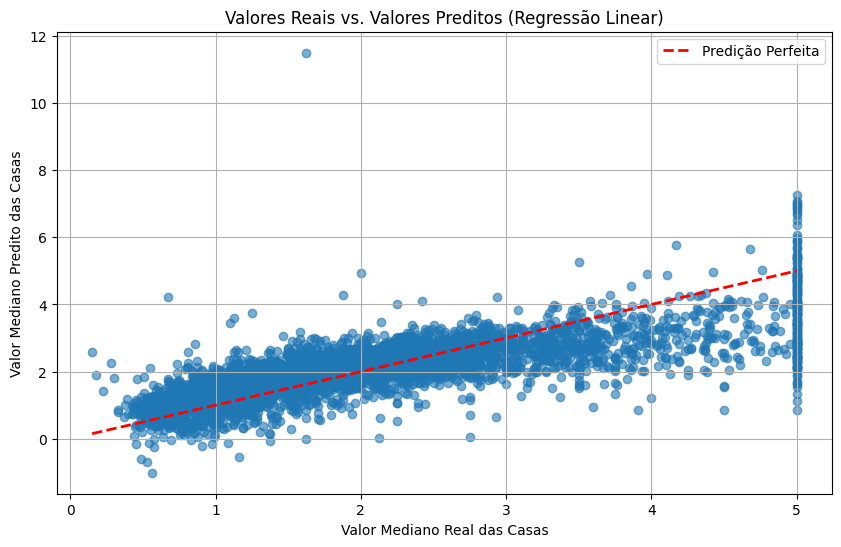

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predição Perfeita')
plt.title('Valores Reais vs. Valores Preditos (Regressão Linear)')
plt.xlabel('Valor Mediano Real das Casas')
plt.ylabel('Valor Mediano Predito das Casas')
plt.grid(True)
plt.legend()
plt.show()

##e) Baseado nos resultados obtidos (MAE e R²), você diria que este modelo é bom para prever preços de casas? Justifique sua resposta explicando o que cada métrica significa nesse contexto.

MAE (Erro Médio Absoluto): O Erro Médio Absoluto (MAE) de 0.5309 indica que, em média, as previsões do modelo desviam-se de 0.5309 unidades dos valores reais. No contexto de preços de casas na Califórnia, onde a variável alvo está em centenas de milhares de dólares, isso representa um erro médio de aproximadamente US$ 53.090.

R² (Coeficiente de Determinação): O Coeficiente de Determinação (R²) de 0.7734 demonstra que 77.34% da variância nos preços das casas é explicada pelo modelo. Um valor próximo a 1 indica que o modelo captura uma grande proporção da variabilidade dos dados.

Conclusão: O modelo é razoável/bom. O MAE fornece a magnitude do erro em termos monetários (US$ 53.090 de erro médio), enquanto o R² indica que mais de três quartos da variação dos preços é explicada pelo modelo. Ou seja, depende da tolerância a erros exigida e da complexidade da variação dos preços no mercado imobiliário.

# Questão 3: Perceptron

O Perceptron é o modelo mais simples de rede neural artificial, utilizado para classificação linear de dados. Ele ajusta seus pesos a partir de exemplos rotulados, aprendendo a separar duas classes com uma linha (ou hiperplano).

O código abaixo foi feito para que você possa acompanhar o desenvolvimento de uma camada de perceptrons. Complete-o de acordo com o que os comentários pedem.

##Instalando as Dependências

In [27]:
!pip install torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

##Importando as Bibliotecas

In [28]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

##Digits

In [29]:
# Transformação para converter imagens em tensores e normalizar
transform = transforms.Compose([
    transforms.ToTensor(),  # converte para tensor
    transforms.Normalize((0.1307,), (0.3081,))  # normalização dos dados
])

# Baixando o dataset MNIST-treino
full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Baixando o dataset MNIST-teste
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Definindo proporção de treino/validação (ex: 90% treino, 10% validação)
train_size = int(0.9 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

# Dividindo os dados
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Loaders para treino, validação e teste
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 595kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.37MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.02MB/s]


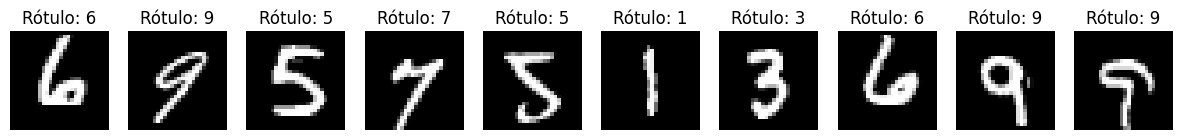

In [30]:
# Exibindo algumas imagens do dataset de treino
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    axes[i].imshow(example_data[i][0], cmap='gray')
    axes[i].set_title(f"Rótulo: {example_targets[i].item()}")
    axes[i].axis('off')
plt.show()

In [31]:
# Definindo a estrutura do modelo que vamos utilizar
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()  #acha a imagem 28x28 em um vetor de 784 pixels
        self.fc1 = nn.Linear(28 * 28, 10)#mapeia 784 entradas para 10 saidas

    def forward(self, x):
        x = self.flatten(x)#fluxo de dados achata a imagem
        return self.fc1(x)#passa a entrada achatada pela camada linear

In [32]:
model = Model()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("\nModelo Perceptron inicializado e movido para o dispositivo:", device)


Modelo Perceptron inicializado e movido para o dispositivo: cpu


In [33]:
# Definindo a nossa função de perda e o otimizador

# Defina uma função de perda apropriada para o problema de classificação proposto
# CrossEntropyLoss é ideal para classificação multiclasse e combina Softmax + NLLLoss
criterion = nn.CrossEntropyLoss()

# Defina a função de otimização, utilizando os parâmetros do modelo e uma taxa de aprendizado
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Defina o numero de épocas de treinamento do modelo
epochs = 10   #pode ser ajustado

print("\n--- Função de Perda, Otimizador e Número de Épocas Definidos ---")
print(f"Função de Perda: {criterion}")
print(f"Otimizador: {optimizer}")
print(f"Número de Épocas de Treinamento: {epochs}")


--- Função de Perda, Otimizador e Número de Épocas Definidos ---
Função de Perda: CrossEntropyLoss()
Otimizador: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Número de Épocas de Treinamento: 10


In [34]:
def train_model(model, train_loader, val_loader, optimizer, criterion, device, epochs):
    model.to(device) # Garante que o modelo está no dispositivo correto (CPU/GPU)

    print("\n--- Iniciando o Treinamento do Modelo ---")
    for epoch in range(epochs):
        # --- Treinamento ---
        model.train() # Coloca o modelo em modo de treinamento (habilita dropout/batchnorm, se houver)
        train_loss = 0
        train_correct = 0
        train_total = 0

        for batch_idx, (data, targets) in enumerate(train_loader):
            data, targets = data.to(device), targets.to(device)

            # Zere os gradientes acumulados antes de cada backward pass
            optimizer.zero_grad()

            # Forward pass: gere as previsões
            outputs = model(data)

            # Calcule a perda entre previsão e rótulo
            loss = criterion(outputs, targets)

            # Backward pass: calcule os gradientes da perda em relação aos parâmetros do modelo
            loss.backward()

            # Atualize os pesos do modelo com os gradientes calculados
            optimizer.step()

            train_loss += loss.item() * data.size(0)
            _, predicted = outputs.max(1)
            train_total += targets.size(0)
            train_correct += predicted.eq(targets).sum().item()

        avg_train_loss = train_loss / train_total
        train_acc = train_correct / train_total * 100

        # --- Validação ---
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        # Desativando o cálculo de gradientes
        with torch.no_grad():
            for data, targets in val_loader:
                data, targets = data.to(device), targets.to(device)

                outputs = model(data)
                loss = criterion(outputs, targets)

                val_loss += loss.item() * data.size(0)
                _, predicted = outputs.max(1)
                val_total += targets.size(0)
                val_correct += predicted.eq(targets).sum().item()

        avg_val_loss = val_loss / val_total
        val_acc = val_correct / val_total * 100

        # --- Resultados ---
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"  Treino     - Loss: {avg_train_loss:.4f} | Acurácia: {train_acc:.2f}%")
        print(f"  Validação  - Loss: {avg_val_loss:.4f} | Acurácia: {val_acc:.2f}%\n")

train_model(model, train_loader, val_loader, optimizer, criterion, device, epochs)#chama função de treinamento após sua definição


--- Iniciando o Treinamento do Modelo ---
Epoch 1/10
  Treino     - Loss: 0.4824 | Acurácia: 86.92%
  Validação  - Loss: 0.3574 | Acurácia: 90.42%

Epoch 2/10
  Treino     - Loss: 0.3390 | Acurácia: 90.36%
  Validação  - Loss: 0.3287 | Acurácia: 91.08%

Epoch 3/10
  Treino     - Loss: 0.3155 | Acurácia: 90.98%
  Validação  - Loss: 0.3157 | Acurácia: 91.42%

Epoch 4/10
  Treino     - Loss: 0.3038 | Acurácia: 91.37%
  Validação  - Loss: 0.3107 | Acurácia: 91.55%

Epoch 5/10
  Treino     - Loss: 0.2957 | Acurácia: 91.62%
  Validação  - Loss: 0.3037 | Acurácia: 91.83%

Epoch 6/10
  Treino     - Loss: 0.2902 | Acurácia: 91.74%
  Validação  - Loss: 0.3034 | Acurácia: 91.70%

Epoch 7/10
  Treino     - Loss: 0.2858 | Acurácia: 91.89%
  Validação  - Loss: 0.2978 | Acurácia: 92.00%

Epoch 8/10
  Treino     - Loss: 0.2822 | Acurácia: 92.09%
  Validação  - Loss: 0.2961 | Acurácia: 91.88%

Epoch 9/10
  Treino     - Loss: 0.2792 | Acurácia: 92.11%
  Validação  - Loss: 0.2972 | Acurácia: 92.12%

Epo

In [35]:
train_model(model, train_loader, val_loader, optimizer, criterion, device, epochs)


--- Iniciando o Treinamento do Modelo ---
Epoch 1/10
  Treino     - Loss: 0.2743 | Acurácia: 92.26%
  Validação  - Loss: 0.2939 | Acurácia: 92.17%

Epoch 2/10
  Treino     - Loss: 0.2724 | Acurácia: 92.34%
  Validação  - Loss: 0.2893 | Acurácia: 92.07%

Epoch 3/10
  Treino     - Loss: 0.2705 | Acurácia: 92.44%
  Validação  - Loss: 0.2919 | Acurácia: 92.07%

Epoch 4/10
  Treino     - Loss: 0.2693 | Acurácia: 92.44%
  Validação  - Loss: 0.2898 | Acurácia: 92.37%

Epoch 5/10
  Treino     - Loss: 0.2677 | Acurácia: 92.48%
  Validação  - Loss: 0.2895 | Acurácia: 92.40%

Epoch 6/10
  Treino     - Loss: 0.2662 | Acurácia: 92.55%
  Validação  - Loss: 0.2901 | Acurácia: 92.32%

Epoch 7/10
  Treino     - Loss: 0.2653 | Acurácia: 92.59%
  Validação  - Loss: 0.2880 | Acurácia: 92.42%

Epoch 8/10
  Treino     - Loss: 0.2640 | Acurácia: 92.61%
  Validação  - Loss: 0.2898 | Acurácia: 92.30%

Epoch 9/10
  Treino     - Loss: 0.2629 | Acurácia: 92.66%
  Validação  - Loss: 0.2887 | Acurácia: 92.35%

Epo

In [36]:
def test_model(model, test_loader, criterion, device):
    model.eval()
    model.to(device)
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            loss = criterion(outputs, targets)

            test_loss += loss.item() * data.size(0)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    avg_loss = test_loss / total
    acc = correct / total * 100

    print(f"Teste Loss médio: {avg_loss:.4f} | Acurácia: {acc:.2f}%")

In [37]:
test_model(model, test_loader, criterion, device)

Teste Loss médio: 0.2706 | Acurácia: 92.36%


In [38]:
def visualize_predictions(model, data_loader, device, num_images=10):
    model.eval()
    model.to(device)
    images_shown = 0

    with torch.no_grad():
        for data, targets in data_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            _, predicted = outputs.max(1)

            fig, axes = plt.subplots(1, num_images, figsize=(15, 4))
            for i in range(num_images):
                axes[i].imshow(data[i][0].cpu(), cmap='gray')
                axes[i].set_title(f"Predição: {predicted[i].item()}\nRótulo: {targets[i].item()}")
                axes[i].axis('off')
            plt.tight_layout()
            plt.show()

            images_shown += num_images
            break

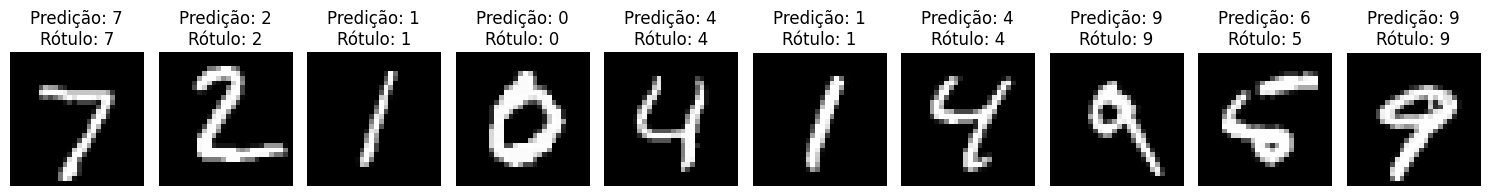

In [39]:
visualize_predictions(model, test_loader, device)